# Критерии согласия

В Python, как и в любых других статистических пакетах, уже реализованы многие критерии, которые мы изучали. Давайте посмотрим, как применять эти критерии на практике.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.descriptivestats import sign_test

import warnings 
warnings.simplefilter("ignore")

In [2]:
np.random.seed(123)

## Критерий Колмогорова-Смирнова

Начнем с критерия согласия Колмогорова. Этот критерий проверяет простую гипотезу о принадлежности выборки некоторому (непрерывному!) закону распределения. Критерий Колмогорова реализован с помощью функции `kstest` в модуле `stats`:

`stats.kstest(sample, cdf)`

- `sample` — реализация нашей выборки
- `cdf` — функция распределения закона, с которым сравниваем.

Критерий Колмогорова-Смирнова сравнивает функции кумулятивных распределений (cdf) двух выборочных распределений и оценивает, насколько они похожи.

Если две выборки взяты из одного и того же распределения, диапазоны значений $x$ должны в значительной степени перекрываться.

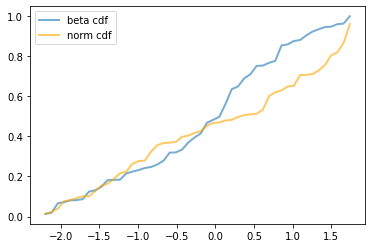

In [3]:
from scipy.stats import norm, beta
fig, ax = plt.subplots(1, 1)
x = beta.rvs(2, 2, size=50) # beta distribution
x2 = norm.rvs(size=50) # normal distribution
vals = np.linspace(min([x.min(),x2.min()]), max([x.max(),x2.max()]), 50)
ax.plot(vals, beta.cdf(sorted(x), 2, 2), lw=2, alpha=0.6, label='beta cdf')
ax.plot(vals, norm.cdf(sorted(x2)), color='orange', lw=2, alpha=0.6, label='norm cdf')
plt.legend();

Критерий Колмогорова-Смирнова количественно определяет разницу между двумя вероятностынми распределениями по максимальному промужутку $y$-расстояния между двумя функциями кумулятивного распределения.

In [6]:
n = 500 # размер выборки

In [7]:
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2, size=n) # выборка 2 из бета-распределения с параметрами (2,2)

Давайте сначала посмотрим на гистограммы для `sample1` и `sample2`

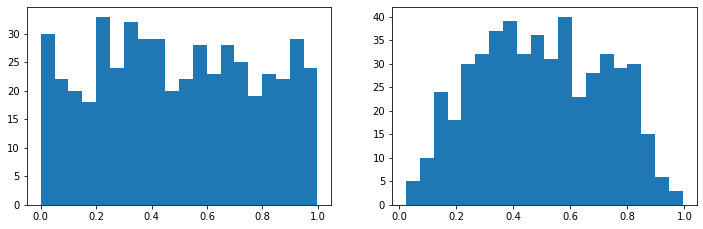

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

Запускаем критерий Колмогорова для `sample1`, проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1]. Должны получить большой `p-value` (что будет означать, что значение статистики попало в область вероятных значений).

In [8]:
stats.kstest(sample1, stats.uniform.cdf)

KstestResult(statistic=0.02977893867201975, pvalue=0.7553346739924274)

Запускаем критерий Колмогорова для `sample2`, проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1]. Должны получить малый `p-value` (что будет означать, что значение статистики попало в область маловероятных значений).

In [9]:
stats.kstest(sample2, stats.uniform.cdf)

KstestResult(statistic=0.109059197161369, pvalue=1.2372423114520465e-05)

Запускаем критерий Колмогорова для `sample1`, проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2). Обратите внимание на то, как передавать параметры для функции плотности.

In [10]:
stats.kstest(sample1, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.09860184733194155, pvalue=0.00011034826529907896)

Запускаем критерий Колмогорова для `sample2`, проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).

In [11]:
stats.kstest(sample2, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.023712619065139495, pvalue=0.9348640500106189)

## Критерий $\chi^2$

Статистика $\chi^2$ — метрический показатель, который измеряет степень, с которой наблюдаемые данные отступают от ожидания.

Этот критерий реализован с помощью функции `chisquare` в модуле `stats`:
    
`stats.chisquare(obs, exp)`

- `obs` — количества попаданий в каждую "ячейку"
- `exp` — ожидаемые количества попаданий в каждую "ячейку".

Обратите внимание на то, что мы передаем в функцию `chisquare` не вероятности (эмпирические и истинные), а количества!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Частота | Вероятность |
|:-------------------- |--------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [331]:
# занесем данные из таблицы в массивы

obs = np.array([315/556, 101/556, 108/556, 32/556])
exp = np.array([9/16, 3/16, 3/16, 1/16])

In [332]:
# вспомним о том, что в функцию chisquare мы должны передавать количества, а не частоты

obs = obs * 556
exp = exp * 556

Статистика $\chi^2$ задается как сумма квадратических остатков Пирсона:
$$\chi^2 = \sum_{i}^{r}\sum_{j}^{c}{R^2}$$
где $r$ и $c$ — соответственно число строк и столбцов.

Остаток Пирсона задается формулой: R = (наблюдаемое - ожидаемое) / ожидаемое ** 0.5

In [334]:
(((obs - exp) / np.sqrt(exp)) ** 2).sum()

0.47002398081534874

In [335]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

## Проверка нормальности

Очень важный тип критериев согласия — это проверка нормальности. На лекции мы изучали следующие методы: 

1. `qqplot(sample, dist, line='r')` — построение квантильного графика (Q-Q Plot) — визуальная проверка любого критерия согласия о масштабе/сдвиге. Аргументы: `sample` — наша выборка, `dist` — распределение, с которым сравниваем (если этот параметр не указан, то используется нормальное распределение), `line='r'` — подгоняет прямую под облако точек, чтобы было проще визуально сравнивать.
2. `stats.shapiro(sample)` — критерий Шапиро-Уилка. Аргументы: `sample` — наша выборка.
3. `stats.jarque_bera(sample)` — критерий Харке-Бера. Аргументы: `sample` — наша выборка.

In [15]:
# поменяем размер выборки, если нужно
n = 500

In [16]:
sample1 = np.random.normal(1,2, size=n) # выборка из нормального распределения
sample2 = np.random.beta(2,2, size=n) # выборка из бета-распределения с параметрами (2,2)

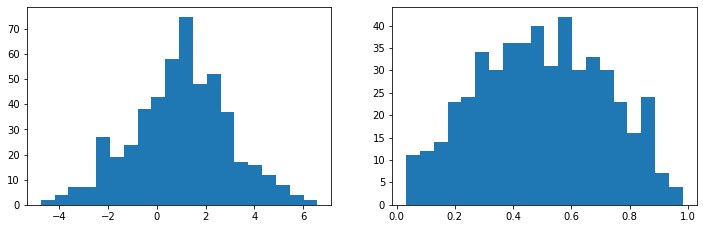

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

### Квантиль-квантильный график

Квантиль-квантильный график используется, чтобы визуально определить, насколько близко выборка находится от нормального распределения. QQ-график упорядочивает $z$-оценки снизу вверх и графически отображает $z$-оценки каждого значения на оси $y$; ось $x$ — это соответствующий квантиль нормального распределения для ранга конкретного значения. Поскольку данные нормализованы, единицы соответствуют числу стандартных отклонений данных от среднего. Если точки примерно ложатся на диагональную линию, то распределение выборки можно рассматривать близким к нормальному. 

In [18]:
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

/Users/popov/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


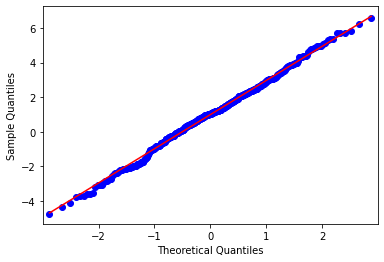

In [21]:
# график квантилей для sample1
qqplot(sample1, line='s')
plt.show()

/Users/popov/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


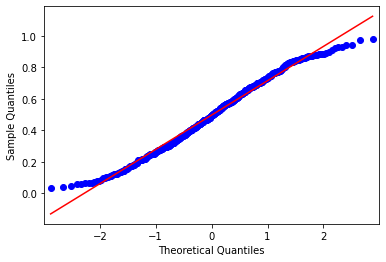

In [22]:
# график квантилей для sample2
qqplot(sample2, line='s')
plt.show()

In [23]:
# запускаем критерий Шапиро-Уилка для sample1
stats.shapiro(sample1)

ShapiroResult(statistic=0.9959383010864258, pvalue=0.2265419065952301)

In [24]:
# запускаем критерий Шапиро-Уилка для sample2
stats.shapiro(sample2)

ShapiroResult(statistic=0.9849844574928284, pvalue=4.944821193930693e-05)

In [25]:
# запускаем критерий Харке-Бера для sample1
stats.jarque_bera(sample1)

Jarque_beraResult(statistic=0.5047526531339083, pvalue=0.7769522952554369)

In [26]:
# запускаем критерий Харке-Бера для sample2
stats.jarque_bera(sample2)

Jarque_beraResult(statistic=13.737779567593636, pvalue=0.001039630638919098)

# Проверка однородности. Независимые выборки

***
В файле aggress.xls содержаться бальные оценки агресивности детей 4-х лет, проявленной в течении 15-ти минут после игры. Первые 12 детей — мальчики, остальные 12 детей — девочки. Необходимо проверить гипотезу однородности мальчиков и девочек.

In [6]:
data = pd.read_excel('aggress.xls')

In [15]:
data.head()

,GENDER,AGGRESSN
0,BOYS,86
1,BOYS,69
2,BOYS,72
3,BOYS,65
4,BOYS,113


Перед анализом данных полезно визулизировать данные. Это позволит получить какой-то априорный вывод о данных и избежать ошибок в дальнейшем (например, при вызове функций с неправильными альтернативами).Для визуализации различий лучше всего использовать "ящик с усами" (boxplot)

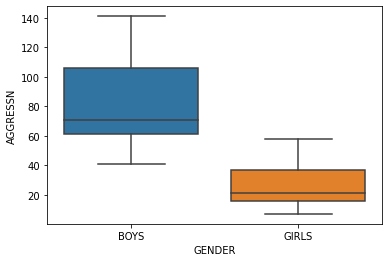

In [22]:
sns.boxplot(x='GENDER', y='AGGRESSN', data=data);

Теперь извлечем разделим данные для мальчиков и девочек. Преобразовывать в numpy array здесь вовсе не обязательно (это удобно только при оценке параметра сдвига).

In [7]:
sample1 = data[data['GENDER'] == 'BOYS']['AGGRESSN'].to_numpy()
sample2 = data[data['GENDER'] == 'GIRLS']['AGGRESSN'].to_numpy()

### Критерий Колмогорова-Смирнова
Начнем с критерия Колмогорова-Смирнова. Этот критерий проверяет простую гипотезу о равенстве двух (непрерывных!) функций распределения, из которых получены выборки, против любой альтернативы. 

`stats.ks_2samp(sample1, sample2, alternative)` — тут `sample1` и `sample2` — реализации первой и второй выборки, а `alternative` — альтернатива, которая используется. По умолчанию `alternative='two-sided'`; другие варианты: `less` и `greater`.

Обратите внимание, что альтернатива формулируется для функций распределений, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать `alternative='less'`.

In [24]:
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.8333333333333334, pvalue=0.00020413023508998745)

In [25]:
stats.ks_2samp(sample1, sample2, alternative='less')

KstestResult(statistic=0.8333333333333334, pvalue=0.00010206511754499368)

In [26]:
stats.ks_2samp(sample1, sample2, alternative='greater')

KstestResult(statistic=0.0, pvalue=1.0)

А можно ли применять критерий Колмогорова-Смирнова для этих данных? Ответ: скорее нет, чем да (данные дискретны).

### Критерий Манна-Уитни
Перейдем к критерию Манна-Уитни. Этот критерий проверяет простую гипотезу о равенстве двух функций распределений, из которых получены выборки, против альтернативы доминирования (!). Он реализован с помощью функции `mannwhitneyu` в модуле `stats`:

`tats.mannwhitneyu(sample1, sample2, alternative)` — тут `sample1` и `sample2` — реализации первой и второй выборки, а `alternative` — альтернатива, которая используется. По умолчанию `alternative=None`; другие варианты: `two-sided`, `less` и `greater`. 

Официальная документация говорит, что `alternative=None` оставлена только для совместимости со старыми версиями реализации этого критерия.

Правильно, конечно, использовать односторонние версии критерия Манна-Уитни. Обратите внимание, что в отличие от критерия Колмогорова, тут альтернатива формулируется уже для выборок, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать `alternative='greater'`.

In [27]:
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=6.0, pvalue=7.738460169928243e-05)

In [28]:
stats.mannwhitneyu(sample1, sample2, alternative='two-sided')

MannwhitneyuResult(statistic=138.0, pvalue=0.00015476920339856486)

In [29]:
stats.mannwhitneyu(sample1, sample2, alternative='greater')

MannwhitneyuResult(statistic=138.0, pvalue=7.738460169928243e-05)

In [30]:
stats.mannwhitneyu(sample1, sample2, alternative='less')

MannwhitneyuResult(statistic=138.0, pvalue=0.9999387453412919)

### Критерий Стьюдента ($t$-тест)

Мы еще изучали параметрические критерии Стьюдента для независимых выборок ($Z$-критерий и $t$-критерий). Эти критерии проверяют простую гипотезу о равенстве средних двух нормальных распределений против любой альтернативы. $Z$-критерий мы не будем рассматривать, так как для него необходимо знать дисперсию (которая никогда не является известной). А $t$-критерий частично реализован с помощью функции `ttest_ind`:

`stats.ttest_ind(sample1, sample2, equal_var)` — $t$-критерий для случая независимых выборок. Тут `sample1` и `sample2` — реализации первой и второй выборки, а `equal_var` булевая переменная, которая связана с предположением равенства дисперсии. По умолчанию она принимает значение True, но лучше использовать False, чтобы запускался аппроксимационный критерий (Уэлча), а не точный (Стьюдента).

Различные альтернативы, к сожалению, пока не реализованы. 

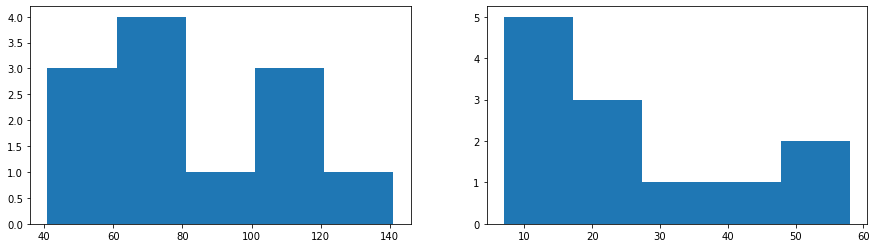

In [10]:
# посмотрим на гистограмму
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 
ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)
plt.show()

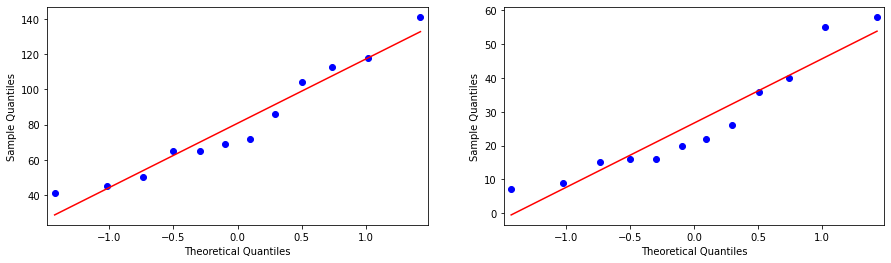

In [23]:
# посмотрим на qqplot
from statsmodels.graphics.gofplots import qqplot

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 
qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2);

Конечно, ни о какой нормальности в этих данный и не идет речь. Тем не менее попробуем применить критерий Стьюдента.

In [24]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=5.192725143888218, pvalue=3.3078399999803046e-05)

### Оценка параметра "сдвига"
С помощью "ящиков с усами" мы заметили, что после игры агресивность мальчиков больше, чем у девочек. С помощью критериев однородности, мы убедились, что эти различия значимы. Теперь давайте ответим на вопрос: а на сколько в среднем агресивность мальчиков больше, чем у девочек? Для этого лучше всего использовать медиану попарных разностей.

In [26]:
np.median([[sample1[i] - sample2[j] for j in range(len(sample2))] for i in range(len(sample1))]) 

50.0

## Проверка однородности. Зависимые выборки

***
В файле reaction.xls содержаться времена реакции $i$-го испытуемого на световой и звуковой сигналы соответственно. Необходимо проверить гипотезу однородности времен рекции на различные раздражители.

In [31]:
data = pd.read_excel('reaction.xls')

In [32]:
data.head()

,LIGHT,SOUND
0,176,168
1,163,215
2,152,172
3,155,200
4,156,191


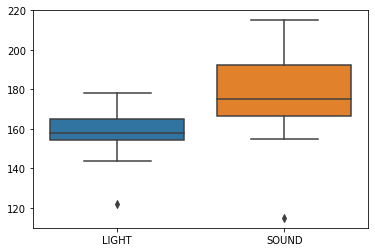

In [37]:
sns.boxplot(data=data);

In [38]:
sample1 = data['LIGHT'].to_numpy()
sample2 = data['SOUND'].to_numpy()

### Критерий знаков

Начнем с критерия знаков. Этот критерий предназначен для случая двух зависимых выборок и проверяет простую гипотезу о равенстве параметра сдвига $\theta$ нулю против любой альтернативы.  Он частично реализован уже в модуле `statsmodels` с помощью функции `sign_test`:

`sign_test(sample)` — тут в качестве `sample` подразумевается разность двух выборок.  

К сожалению, в Python этот тест не реализован полностью: у нас нет возможности проверять односторонние альтернативы.

In [39]:
from statsmodels.stats.descriptivestats import sign_test

In [40]:
sign_test(sample1 - sample2)

(-3.5, 0.06542968749999997)

### Критерий знаковых рангов Уилкоксона

Перейдем теперь к критерию знаковых рангов Уилкоксона. Этот критерий предназначен для случая двух зависимых выборок и проверяет простую гипотезу о равенстве параметра сдвига $\theta$ нулю против любой альтернативы. Он реализован с помощью функции `wilcoxon` в модуле `stats`:

`stats.wilcoxon(sample1, sample2, alternative, mode)` — тут `sample1` и `sample2` — реализации первой и второй выборки (можно передать одним аргументом сразу их разность), `alternative` — альтернатива, которая используется (по умолчанию `two-sided`; другие варианты: `less` и `greater`) и `mode` — какое нулевое распределение используется (по умолчанию `auto`; другие варианты: `exact`, `approx`).

Есть различные способы вычисления уровня значимости (либо точно `mode='exact'`, либо с помощью нормальной аппроксимации `mode='approx'`). Опция `mode='auto'` использует `exact`, если $n \leq 25$ и `approx` в противном случае.

Напомним, что в критерии Уилкоксона делается дополнительное предположение о симметричности распределения остатков. Проверим это предположение визуально.

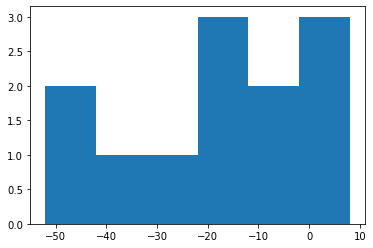

In [41]:
plt.figure(figsize=(6,4))
plt.hist(sample1 - sample2, bins=6);

Скорее всего, остатки не имеют симметричное распределение. Но мы все равно применим критерий Уилкоксона.

In [42]:
stats.wilcoxon(sample1, sample2)

WilcoxonResult(statistic=4.5, pvalue=0.011197738894413023)

In [43]:
stats.wilcoxon(sample1, sample2, alternative='less')

WilcoxonResult(statistic=4.5, pvalue=0.005598869447206512)

### Критерий Стьюдента ($t$-тест)

`stats.ttest_rel(sample1, sample2)` — $t$-критерий для случая зависимых выборок. Тут `sample1` и `sample2` — реализации первой и второй выборки.

Конечно, перед его применением необходимо проверить нормальность данных. Судя по построенной выше гистограмме, это предположение не выполняется. Построим еще qqplot.

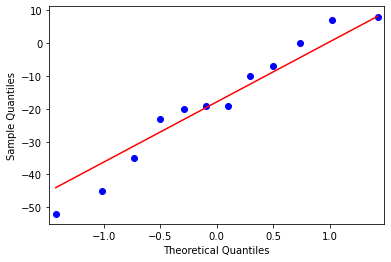

In [44]:
qqplot(sample1 - sample2, line='s');

In [45]:
# проверим нормальность и с помощью критерия Шапиро-Уилка
stats.shapiro(sample1 - sample2)

ShapiroResult(statistic=0.9517226219177246, pvalue=0.6622905731201172)

Конечно, сомнительно применять критерий Стьюдента в данном случае. Визуальная проверка убеждает нас в том, что данные не имеют нормальное распределение. А вот критерий Шапиро-Уилка не отвергают гипотезу о нормальности данных — выборка слишком маленькая.
Тем не менее попробуем применить критерий Стьюдента.

In [46]:
stats.ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-3.248672347118036, pvalue=0.007753503906276274)

Параметрические критерии более чувствительные — самый маленький фактический уровень значимости получился у критерия Стьюдента. Только вот он что-то значит, только если гипотеза о нормальности данных выполняется.

### Оценка параметра "сдвига"

С помощью "ящиков с усами" мы заметили, что реакция на световой раздражитель меньше, чем на звуковой. С помощью критериев однородности, мы убедились, что эти различия значимы (примерно на уровне 7%). Теперь давайте ответим на вопрос: а на сколько в среднем реация на световой раздражитель меньше, чем на звуковой? Для этого лучше всего использовать медиану разностей наблюдений.

In [47]:
np.median(sample2 - sample1)

19.0

## Проверка однородности. Критерий хи-квадрат

Посмотрим, как применять критерии хи-квадрат для проверки однородности независимых выборок.

***
Перед вами результаты медицинских исследований. Из 1500 мужчин, испытывающих лекарство, выздоровели 700, из 210 не принимавших выздоровели 80. Из 220 принимавших женщин — 150, из 680 не принимавших — 400. Проверить, влияет ли лекарство на мужчин? На женщин? На людей обоих полов?

Запишем аккуратно данные. Пусть $A$ — принимавшие лекарство, $\bar{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\bar{B}$ — не выздоровевшие.

<table>
<tr><td>
    
|Мужчины| $B$ |  $\bar{B}$|
|--|--|--|
|$A$| 700 | 800 |
|$\bar{A}$| 80 | 130 |

</td><td>
    
|Женщины| $B$ |  $\bar{B}$|
|--|--|--|
|$A$| 150 | 70 |
|$\bar{A}$| 400 | 280 |

</td><td>

|Вместе| $B$ |  $\bar{B}$|
|--|--|--|
|$A$| 850 | 870 |
|$\bar{A}$| 480 | 410 |

</td></tr> </table>

In [3]:
# перепишем данные 
men = np.array([[700,800], [80,130]])
women = np.array([[150,70], [400,280]])
both = men + women

### Есть ли эффект от лекарства у мужчин? 

Заметим, что среди принимавших лекарство мужчин доля выздоровевших больше, чем среди мужчин, не принимавших лекарство:

$$\frac{700}{700 + 800} \approx 0.467 \qquad > \qquad 0.381 \approx \frac{80}{80 + 130}.$$
  
Проверим, значимо ли это различие.

In [4]:
# можно реализовать криетрий вручную 

n = np.sum(men) # количество испытуемых
n1, n2 = np.sum(men, axis=1) # количество испытуемых, принимавших и не принимавших лекарство
p = np.sum(men, axis=0) / n # вероятности попасть в (B) и (not B)
exmen = np.array([p*n1, p*n2]) # ожидаемые количества в каждой ячейке

statistic = np.sum((men - exmen) ** 2 / exmen)
pvalue = 1 - stats.chi2.cdf(statistic, df=1)

print(f"{statistic = }")
print(f"{pvalue = }")

statistic = 5.455512229705774
pvalue = 0.019506684444057898


In [5]:
# второй спобоб реализации 
stats.chi2_contingency(men, correction=False)

(5.455512229705774,
 0.019506684444057915,
 1,
 array([[684.21052632, 815.78947368],
        [ 95.78947368, 114.21052632]]))

Критерий хи-квадрат признал различие значимым на уровне ~ 2\%.

### Есть ли эффект от лекарства у женщин? 

Аналогично, среди принимавших лекарство женщин доля выздоровевших больше, чем среди женщин, не принимавших лекарство:

$$\frac{150}{150 + 70} \approx 0.682 \qquad > \qquad 0.588 \approx \frac{400}{400 + 280}.$$
  
Проверим, значимо ли это различие.

In [6]:
stats.chi2_contingency(women)

(5.737976595596912,
 0.016601907318792426,
 1,
 array([[134.44444444,  85.55555556],
        [415.55555556, 264.44444444]]))

Критерий хи-квадрат признал различие значимым на уровне ≈ 2\%.

### Есть ли эффект от лекарства у мужчин и женщин вместе? 

Как это ни странно, из таблицы с объединенными результатами следует, что доля выздоровевших больше среди тех людей, которые лекарство *не принимали*:

$$\frac{850}{850+870} \approx 0.494 \qquad < \qquad 0.539 \approx \frac{480}{480+410}.$$
  
Проверим, значимо ли это различие.

In [7]:
stats.chi2_contingency(both)

(4.603156848108104,
 0.031913140873073946,
 1,
 array([[876.47509579, 843.52490421],
        [453.52490421, 436.47509579]]))

Критерий хи-квадрат признал различие значимым на уровне ≈ 3.2\%.

### Причина парадокса

Причина парадокса заключается в непропорциональном представительстве в разных категориях: мужчины выздоравливают
хуже, но лекарство испытывалось в основном на них.

На абстрактном уровне речь идет о следующем: из неравенств
    
$$\frac{A_1}{A_1+B_1} \ge \frac{C_1}{C_1+D_1}\quad\text{и}\quad \frac{A_2}{A_2+B_2} \ge \frac{C_2}{C_2+D_2}$$

иногда делается поспешный вывод о справедливости неравенства

$$\frac{A_1+A_2}{A_1+B_1 + A_2+B_2} \ge \frac{C_1+C_2}{C_1+D_1+C_2+D_2}$$

к чему нет никаких предпосылок.

Г. Секей пишет: 
>«Аналогично, новое лекарство может оказаться эффективным в каждом из десяти различных госпиталей, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно».

Кроме того, число мужчин (210), не принимавших лекарство, недостаточно велико: согласно таблице, приведенной в книге
Дж. Флейс «Статистические методы для изучения таблиц долей и пропорций», вероятность ошибки II рода, для таких данных
равна $50\%$. Чтобы обеспечить ошибку второго рода $10\%$, необходимо иметь не менее 475 пациентов в этой категории.

Этот пример показывает, что к выводам, основанным на применении критерия хи-квадрат, следует относиться с осторожностью.

***
Методом перебора найдите наиболее подходящий тип распределения для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить представление о форме плотности распределения. Затем изучите квантильные графики для разных распределений. Если будет такая возможность попробуйте применить какие-то критерии согласия.

In [11]:
data = pd.read_csv('sample.csv')
sample = data.values.flatten()
sample.shape

(100,)

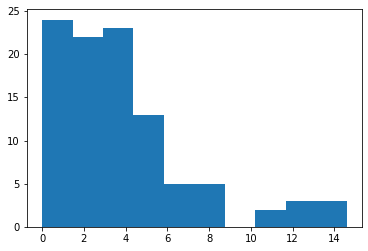

In [12]:
plt.hist(sample);

Однозначно предположить распределение, из которого пришла данная выборка по гистраграмме сложно. Тем не менее, видно, что картина не соответствует нормальному и равномерному распределению. Но есть определенное сходство с экспоненциальным распределением: мы видим большие значения в левой части гистрограммы, которые затем быстро убывают.

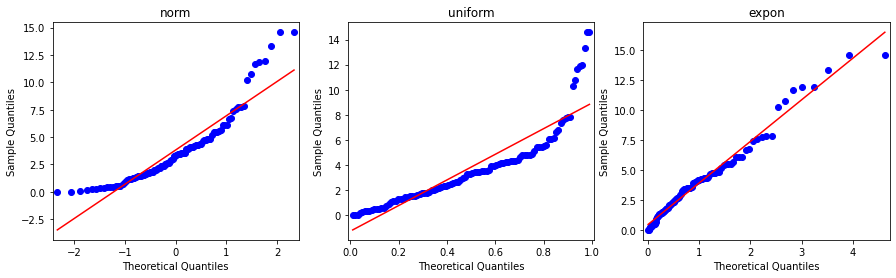

In [29]:
# построим квантильный графики для нормального распределения для трех распределений
dists = [stats.norm, stats.uniform, stats.expon ]

_, axes = plt.subplots(ncols=3, figsize=(15,4))
for ax, dist in zip(axes, dists):
    qqplot(sample, dist=dist, line='r', ax=ax)
    ax.set_title(dist.name)

Как видно из представленных выше графиков, визуально наша выборка больше всего соответствует (хотя и не идеально) экспоненциальному распределению.

In [43]:
# Выполним проверку на экспоненциальность
s = np.sum(sample)
vec = np.zeros(len(sample)-1)
for i in range(1, len(sample)):
    vec[i-1] = np.sum(sample[:i]) / s

stats.kstest(rvs=vec, cdf=stats.uniform.cdf)

KstestResult(statistic=0.07002123333746968, pvalue=0.6900910133412069)

Мы получили p-value 0.69. Значит, критерий Колмогорова не отвергает гипотезу о том, что наша новая выборка, полученная на основе исходной, пришла из равномерного распределения на отрезке [0, 1]. А это, в свою очередь, означает, что гипотеза о том, что наша исходная выборка пришла из экспоненциального распределения также не отвергается.

***
В файле anorexia.txt записан вес пациентов до начала терапии анарексии и после ее окончания. Была терапия эффективна?

In [49]:
anorexia = pd.read_csv('anorexia.txt', delimiter='\t')
anorexia.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


Поскольку в выборках у нас представлены результаты наблюдения за одними и теми же людьми до и после терапии, то данные выборки являются зависимыми.

In [50]:
# создадим два numpy array, содержащих наши выборки
before = anorexia['Before'].to_numpy()
after = anorexia['After'].to_numpy()

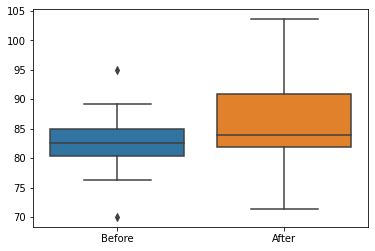

In [54]:
# визуализируем наши данные при помощи boxplot
sns.boxplot(data=anorexia);

Как видно из графика, пространство значений выборки `after` содержит в себе пространство значений выборки `before` (кроме одного выброса), при этом дисперсия выборки `before` заметно меньше, чем у выборки `after`, а медианы практически совпадают. Исходя из имеющейся картины, однозначный вывод о том, что терапия была эффективной, сделать нельзя.

In [55]:
# используем критерий знаков, чтобы проверить гипотезу о том, что выборки пришли из одного распределения
sign_test(before - after)

(-3.5, 0.26493089646101)

Критерий знаков показал `p-value` равное 0.26, что не позволяет нам отвергнуть нулевую гипотезу о том, что выборки пришли из одного распределения. А значит, критерий знаков говорит, что, скорее всего, статистически значимых различий между выборками нет.

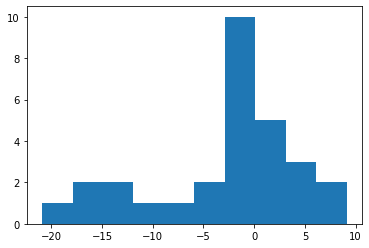

In [56]:
# попробуем оценить симметричность распределения остатков при помощи гистрограммы
plt.hist(before - after);

Скорее всего, остатки не имеют симметричного распределния, тем не менее все же попробуем применить к нашим выборкам критерий Уилкоксона.

In [57]:
stats.wilcoxon(before, after)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [58]:
# поскольку предполагается, что препарат должен помогать в борьбе с анарексией (а значит, 
# у людей после лечения должен увеличиться вес), попробуем также рассмотреть односторонний критерий

stats.wilcoxon(before, after, alternative='less')

WilcoxonResult(statistic=131.5, pvalue=0.031459861313013336)

На уровне значимости 5% критерий Уилкоксона также не отвергает нулевую гипотезу о том, выборки пришли из одного распределения (отсутствует систематический сдвиг). Хотя в данном случае `p-value` получилось уже значительно меньше, чем для критерия знаков. А вот одностронний критерий на уровне значимости 5% уже отвергает нулевую гипотезу в пользу альтернативы, состоящей в том, что выборка `after` стохастически доминирует выборку `before`. Но, опять же, в данном примере остатки, скорее всего, не имеют нормального распределения, поэтому критерий Уилкоксона может работать не вполне корректно.

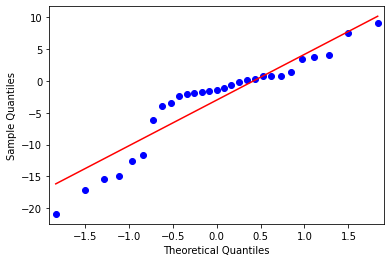

In [59]:
# попробуем также использовать двухвыборочный t-критерий для зависимых выборок, 
# для этого сначала проверим наши данные на нормальность
qqplot(before - after, line='s');

In [60]:
stats.shapiro(before - after)

ShapiroResult(statistic=0.8961783051490784, pvalue=0.007945147342979908)

Критерий Шапиро-Уилка и квантильный график говорят о том, что наши данные, скорее всего, не имеют нормального распределения. Тем не менее посмотрим на $t$-критерий.

In [61]:
stats.ttest_rel(before, after)

Ttest_relResult(statistic=-2.215587843931166, pvalue=0.03502259756218883)

Как мы видим $t$-критерий отвергает гипотезу о том, что выборки пришли из одного распределения, на уровне значимости 5%. Однако, как уже отмечалось, его использование в данном случае представляется не вполне корректным.

In [62]:
# попробуем также оценить параметр сдвига
np.median(before - after)

-1.3999999999999915

Терапия, скорее, была неэффективна. Об этом говорит и `boxplot`, и критерий знаков, и оценка параметра сдвига (которая оказалась близка к нулю с учетом величины значений, принимаемых элеменетами выборок). Критерий Уилкоксона менее однозначен, но на уровне значимости 5%, также говорит о том, что статистически значимой разницы между выборками нет. При этом использование критерия Уилкоксона в данном случае представляется не совсем корректным. $t$-критерий в данном случае использовать не следует, так как не подтверждается предположение о нормальности данных.

***
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?
Заметим, что поскольку по условию задачи объекты недвижимости выбирались случайно, в данном случае нам даны независимые выборки.

In [63]:
seattle = pd.read_csv('seattle.txt', sep='\t')
y2001 = seattle[seattle['Year'] == 2001]['Price'].to_numpy()
y2002 = seattle[seattle['Year'] == 2002]['Price'].to_numpy()

In [76]:
seattle.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


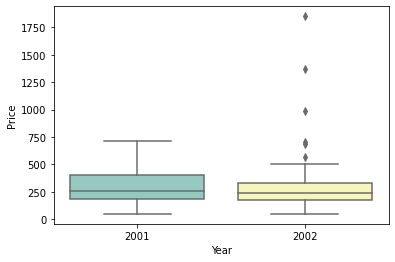

In [75]:
# Для начала посмотрим на данные с помощью boxplot
sns.boxplot(x='Year', y='Price', data=seattle, palette='Set3');

Как мы видим из графика, за исключением нескольких "очень дорогих" выбросов, относящихся к 2002 году, значения, принимаемые выборками лежат примерно в одном диапазоне, и медианы у них примерно равные. Выборка 2002 года характерезуется меньшим разбросом значений (если не учитывать те самые выбросы).

In [77]:
# посмотрим на критерий Колмогорова-Смирнова (считаем, что имеем дело с непрерывными распределениями)
stats.ks_2samp(y2001, y2002)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

Критерий Колмагорова-Смирнова не отвергает нулевую гипотезу о том, что выборки имеют одинаковое распределение.

In [78]:
# посмотрим на критерий Манна-Уитни
stats.mannwhitneyu(y2001, y2002, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

Критерий Манна-Уитни также не отвергает нулевую гипотезу о том, что выборки пришли из одного и того же распределения.

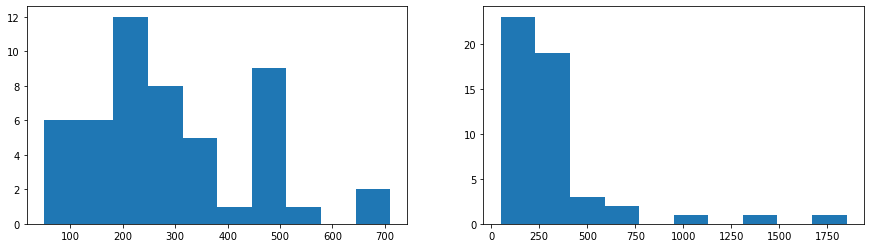

In [79]:
# проверим наши выборки на нормальность
_, ax = plt.subplots(ncols=2, figsize=(15, 4))
ax[0].hist(y2001)
ax[1].hist(y2002);

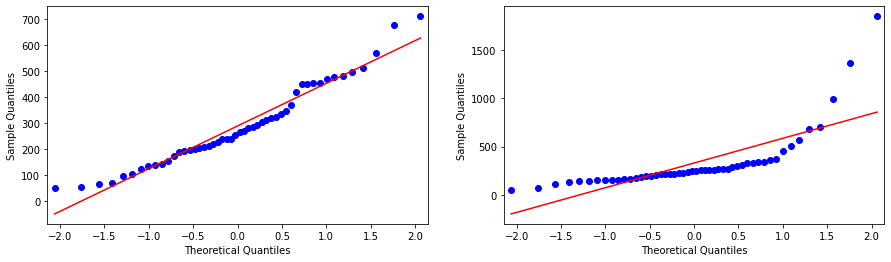

In [80]:
_, ax = plt.subplots(ncols=2, figsize=(15, 4))
qqplot(y2001, ax=ax[0], line='r')
qqplot(y2002, ax=ax[1], line='r');

In [81]:
print(stats.shapiro(y2001))
print(stats.shapiro(y2002))

ShapiroResult(statistic=0.9515296220779419, pvalue=0.03943965956568718)
ShapiroResult(statistic=0.6063637733459473, pvalue=2.4237015172623444e-10)


Как видно, данные в наших выборках, скорее всего, не имеют нормального распределения. Тем не менее рассмотрим двухвыборочный $t$-критерий для независимых выборок.

In [82]:
stats.ttest_ind(y2001, y2002, equal_var=False)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42305786816462243)

Как мы видим, критерий Стьюдета также не отвергает гипотезу о том, что выборки пришли из одого и того же распределения. Но его использование в данной ситуации представляется некорректным.

In [83]:
# также оценим параметр сдвига
np.median([[y2001[i] - y2002[j] for j in range(len(y2002))] for i in range(len(y2001))])

8.149999999999999

In [84]:
# посмотрим еще на значения критериев, если избавиться от выбросов в 2002 году

y2002_ = y2002[y2002 < 500]

print(stats.ks_2samp(y2001, y2002_))
print(stats.mannwhitneyu(y2001, y2002_, alternative='two-sided'))

KstestResult(statistic=0.2441860465116279, pvalue=0.10390396594248075)
MannwhitneyuResult(statistic=1287.5, pvalue=0.10233580034695816)


Как видно, и в случае, если убрать выбросы в 2002 году, то на уровне значимости 5% оба критерия также не отвергают гипотезу о том, что выборки пришли из одного распределения.

*Критерии Колмагорова-Смирнова и Манна-Уитни не отвергают гипотезу о том, что выборки пришли из одинакового распределения. Скорее всего, в среднем за рассматриваемый год цены недвижимости в данном районе Сиэтла статистически значимо не изменились.*

***
В рамках исследования эффективности препарата метилфенидат пациент с синдромом дефицита внимания и гиперактивности в течение недели принимал либо метилфенидат, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемый проходил второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.

Так как оба теста проводятся с одним и тем же испытуемым, мы имеем дело с зависимыми выборками.

In [3]:
tests = pd.read_csv('methylphenidate.txt', sep=' ')
tests.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


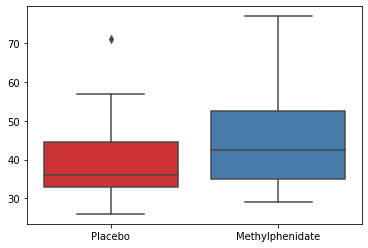

In [11]:
# оценим наши выборки визуально
sns.boxplot(data=tests, palette='Set1');

Как мы видим, значения выборок находятся примерно в одном диапозоне, при этом разброс значений по выборке "метилфенидат" заметно больше.

In [12]:
# создадим два numpy array, содержащих наши выборки
placebo = tests['Placebo'].to_numpy()
drug = tests['Methylphenidate'].to_numpy()

In [13]:
# используем критерий знаков
sign_test(placebo - drug)

(-5.0, 0.06391465663909912)

На уровне значимости 5% критерий знаков не отвергает нулевую гипотезу о том, что наши выборки не содержат статистически значимых различий.

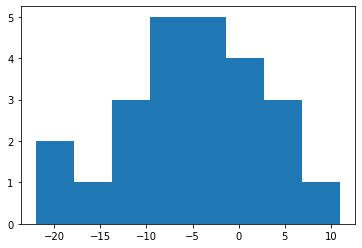

In [15]:
# попробуем оценить симметричность распределения остатков при помощи гистрограммы
plt.hist(placebo - drug, bins=8);

Однозначно говорить о том, что остатки имеют симметричное распределение сложно. Тем не менее применим к нашим данным критерий Уилкоксона.

In [16]:
stats.wilcoxon(placebo, drug)

WilcoxonResult(statistic=48.5, pvalue=0.0025163888931274414)

Поскольку предполагается, что препарат должен помогать тестируемым (а значит, у людей, принимавших препарат оценки за тест должны быть выше, чем у тех, кто принимал плацебо), попробуем также рассмотреть односторонний критерий.

In [17]:
stats.wilcoxon(placebo, drug, alternative='less')

WilcoxonResult(statistic=48.5, pvalue=0.0012581944465637207)

Критерий Уилкоксона говорит о том, что между выборками есть статистически значимые отличия. Односторонний критерий отвергает нулевую гипотезу о том, что выборки пришли из одного распределения, в пользу альтерантивы, которая состоит в том, что выборка `drug` (т.е. оценки тестируемых, принимавших препарат) стохастически доминирует выборку `placebo` (т.е. оценки тех людей, кто принимал плацебо).

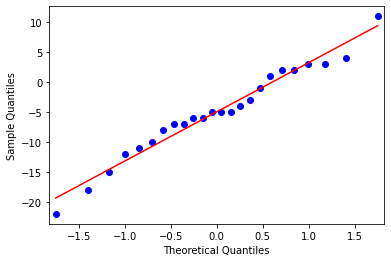

In [18]:
# также проверим наши данные на нормальность
qqplot(placebo - drug, line='r');

In [19]:
stats.shapiro(placebo - drug)

ShapiroResult(statistic=0.9798052906990051, pvalue=0.8922504186630249)

Критерий Шапиро-Уилка не отвергает нулевую гипотезу о том, что разность данных выборок пришла из нормального распределения. Тогда применим к нашим данным критерий Стьюдента.

In [20]:
stats.ttest_rel(placebo, drug)

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Критерий Стьюдента, как и критерий Уилкоксона, говорит о том, что между выборками есть статистически значимые отличия.

In [21]:
# оценим также параметр сдвига
np.median(placebo - drug)

-5.0

*Критерий Уилкоксона (который, наверное, не совсем корректно использовать в данном случае, так как не наблюдается очевидная симметрия остатков) и критерий Стьюдента (к которому нужно относиться с осторожностью, так как это параметрический критерий) говорят, что между выборками есть статистически значимые отличия. Критерий знаков, говорит, что таких отличий нет (для уровня значимости 5%), но его p-value равняется 0.064, и значит, он отвергнет нулевую гипотезу уже на уроне 7%. Сделаем вывод, что, скорее всего, выборки пришли из разных распределений, и люди, которым давали препарат, в среднем, набирают на тестах на 5 баллов больше, чем люди, которым давали плацебо. Все это говорит в пользу эффективности препарата.*

***
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). Влияет ли тип двигателя на расход топлива? А тип коробки передач?

Поскольку мы будем сравнивать расход топлива у автомобилей с двумя разными типами двигаетелей и с двумя разными типами коробок передач (то есть у разных автомобилей), то наши выборки (расхода топлива) в данном случае будут являться независимыми.

In [22]:
cars = pd.read_csv('mtcars.csv', index_col=0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
mpg_v = cars['mpg'][cars['vs'] == 0].to_numpy() # расход топлива у машин с V-образным двигателем
mpg_s = cars['mpg'][cars['vs'] == 1].to_numpy() # расход топлива у машин с рядным двигателем
mpg_a = cars['mpg'][cars['am'] == 0].to_numpy() # расход топлива у машин с АКП
mpg_m = cars['mpg'][cars['am'] == 1].to_numpy() # расход топлива у машин с МКП

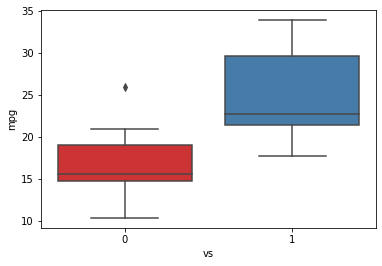

In [29]:
sns.boxplot(data=cars, x='vs', y='mpg', palette='Set1');

Значения расхода топлива для автомобилей с разными типами двигателей заметно различаются.

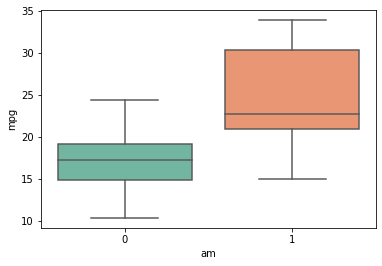

In [30]:
sns.boxplot(data=cars, x='am', y='mpg', palette='Set2');

Похожую картину можно видеть и для разных типов коробок передач, хотя в этом случае уже больше данных лежат в одном диапазоне для каждой из выборок.

 Посмотрим на критерий Колмогорова-Смирнова (считаем, что имеем дело с непрерывными распределениями)

In [41]:
print('Критерий Колмогорова-Смирнова для разных типов двигателей: ', *stats.ks_2samp(mpg_v, mpg_s))
print('Критерий Колмогорова-Смирнова для разных типов КП: ', *stats.ks_2samp(mpg_a, mpg_m))

Критерий Колмогорова-Смирнова для разных типов двигателей:  0.7301587301587301 0.0001328071108758211
Критерий Колмогорова-Смирнова для разных типов КП:  0.6356275303643725 0.00194012440784197


Посмотрим также на односторонний критерий Колмогорова-Смирнова

In [42]:
print(stats.ks_2samp(mpg_v, mpg_s, alternative='greater'))
print(stats.ks_2samp(mpg_a, mpg_m, alternative='greater'))

KstestResult(statistic=0.7301587301587301, pvalue=6.640355543790075e-05)
KstestResult(statistic=0.6356275303643725, pvalue=0.0009700622039210809)


В обоих случаях критерий Колмогорова-Смирнова отвергает гипотезу о том, что между выборками нет статистически значимых различий, а значит можно сделать выводы, что и тип двигателя и тип КП значимо влияют на расход топлива. 

Односторонний критерий говорит о том, что расстояние, которое машина проезжает на 1 галлон топлива, в среднем меньше в случае с V-образными двигателями и АКП (т.е. отвергает нулевую гипотезу о том, что выборки пришли из одинакового распределения в пользу указанной альтернативы).

Посмотрим на критерий Манна-Уитни

In [47]:
print('Критерий Манна-Уитни для разных типов двигателей:', *stats.mannwhitneyu(mpg_v, mpg_s,
                                                                               alternative='two-sided'),
'\nКритерий Манна-Уитни для разных типов КП:', *stats.mannwhitneyu(mpg_a, mpg_m,
                                                                   alternative='two-sided'))

Критерий Манна-Уитни для разных типов двигателей: 22.5 9.034471700053182e-05 
Критерий Манна-Уитни для разных типов КП: 42.0 0.0018713913331785542


In [48]:
# посмотрим также на односторонний критерий Манна-Уитни
print(stats.mannwhitneyu(mpg_v, mpg_s, alternative='less'))
print(stats.mannwhitneyu(mpg_a, mpg_m, alternative='less'))

MannwhitneyuResult(statistic=22.5, pvalue=4.517235850026591e-05)
MannwhitneyuResult(statistic=42.0, pvalue=0.0009356956665892771)


Критерий Манна-Уитни также отвергает нулевую гипотезу о том, что выборки пришли из одного распределения и в случае с типами двигателей, и в случае с коробками передач. Односторонний критерий отвергает нулевую гипотезу о том, что выборки пришли из одного распределения в пользу альтернативы, которая состоит в том, что расстояние, которое машина проезжает на 1 галлон топлива, в среднем, меньше в случае с V-образными двигателями и АКП.

На всякий случай, проверим наши данные на нормальность (и на возможность использования критерия Стьюдента)

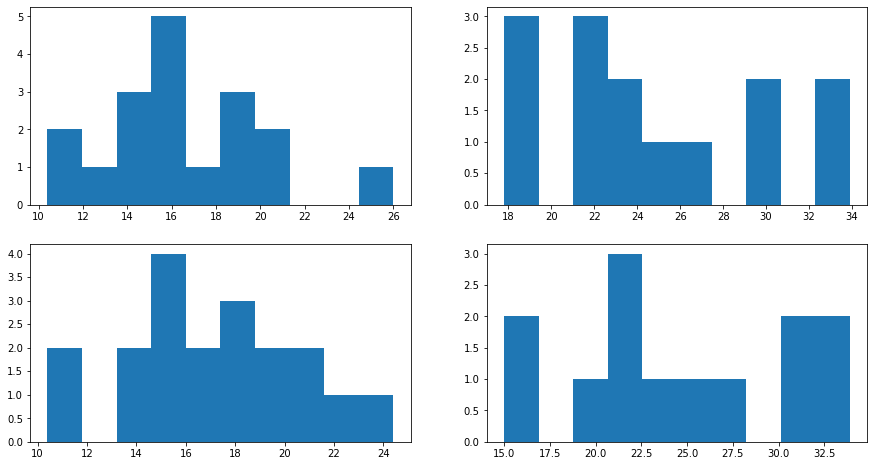

In [49]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax[0,0].hist(mpg_v)
ax[0,1].hist(mpg_s)
ax[1,0].hist(mpg_a)
ax[1,1].hist(mpg_m);

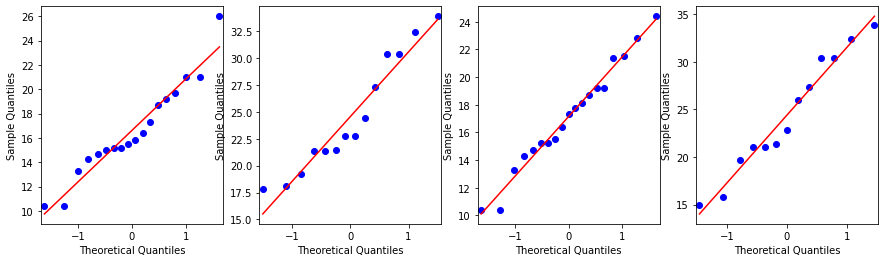

In [50]:
_, ax = plt.subplots(ncols=4, figsize=(15, 4))
qqplot(mpg_v, ax=ax[0], line='r')
qqplot(mpg_s, ax=ax[1], line='r')
qqplot(mpg_a, ax=ax[2], line='r')
qqplot(mpg_m, ax=ax[3], line='r');

In [52]:
print(stats.shapiro(mpg_v), stats.shapiro(mpg_s), stats.shapiro(mpg_a), stats.shapiro(mpg_m), sep='\n')

ShapiroResult(statistic=0.9515073299407959, pvalue=0.44915100932121277)
ShapiroResult(statistic=0.9116623401641846, pvalue=0.16659046709537506)
ShapiroResult(statistic=0.976774275302887, pvalue=0.8987362384796143)
ShapiroResult(statistic=0.9458035826683044, pvalue=0.536271333694458)


Для всех четырех выборок критерий Шапиро-Уилка не отвергает гипотезу о том, что эти данные пришли из нормального распределения. Хотя это, скорее всего, связано с малым числом наблюдений в выборках. Тем не менее воспользуемся также критерием Стьюдента.

In [53]:
print('Критерий Стьюдента для разных типов двигателей:', *stats.ttest_ind(mpg_v, mpg_s, equal_var=False),
'\nКритерий Стьюдента для разных типов КП:', *stats.ttest_ind(mpg_a, mpg_m, equal_var=False))

Критерий Стьюдента для разных типов двигателей: -4.667052730251419 0.00010983680112365942 
Критерий Стьюдента для разных типов КП: -3.767123145144923 0.0013736383330710345


Как и два предыдущих критерия, критерий Стьюдента отвергает гипотезу о том, что выборки пришли из одного распределения.

In [54]:
# также оценим параметры сдвига
print('Оценка параметра сдвига для разных типов двигателей:', 
      np.median([[mpg_v[i] - mpg_s[j] for j in range(len(mpg_s))] for i in range(len(mpg_v))]))

print('Оценка параметра сдвига для разных типов КП:',
      np.median([[mpg_a[i] - mpg_m[j] for j in range(len(mpg_m))] for i in range(len(mpg_a))]))

Оценка параметра сдвига для разных типов двигателей: -7.3500000000000005
Оценка параметра сдвига для разных типов КП: -6.800000000000001


В среднем, автомобили с V-образными двигателями проезжают за 1 галлон топлива на 7.3 мили меньше, чем автомобили с рядными двигателями. В среднем, автомобили с автоматической коробкой передач проезжают за 1 галлон топлива на 6.8 миль меньше, чем автомобили с механической коробкой передач.

*Все три использованных критерия показали, что и в случае с типом двигателя, и в случае с типом коробки передач, между расходами топлива соответствующих автомобилей существует статистически значимая разница. Расход топлива на единицу расстояния больше у автомобилей с V-образным двигателем и с автоматической коробкой передач.*

## Вместо заключения

В статистике известно большое количество критериев согласия и далеко не все из них реализованы в Python. О критериях можно почитать в книге А.И. Кобзарь "Прикладная математическая статистика. Для инженеров и научных работников". (Почти) полный список того, что реализовано в Python можно найти в официальной документации: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats.

Если в официальной документации Вы не найдете нужного критерия, гуглите. Вполне возможно, что критерий, который Вам нужен уже реализован.